In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load data
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
clivelandData = pd.read_csv('data/cleveland.csv', names = features)
hungarianData = pd.read_csv('data/hungary.csv', names = features)
switzerlandData = pd.read_csv('data/switzerland.csv', names = features)

dataTemp=[clivelandData,hungarianData,switzerlandData]
data=pd.concat(dataTemp)

print(clivelandData.shape)
print(hungarianData.shape)
print(switzerlandData.shape)
print(data.shape)

(303, 14)
(294, 14)
(123, 14)
(720, 14)


In [5]:
# droppping unnecessary columns
data=data.drop(["ca","slope","thal"],axis=1)
data=data.replace("?",np.nan)

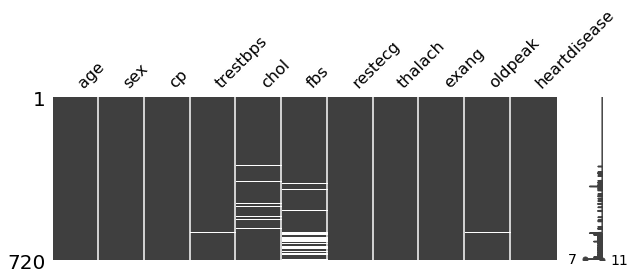

In [6]:
# Missing data detection
msno.matrix(data,figsize=(10,3))

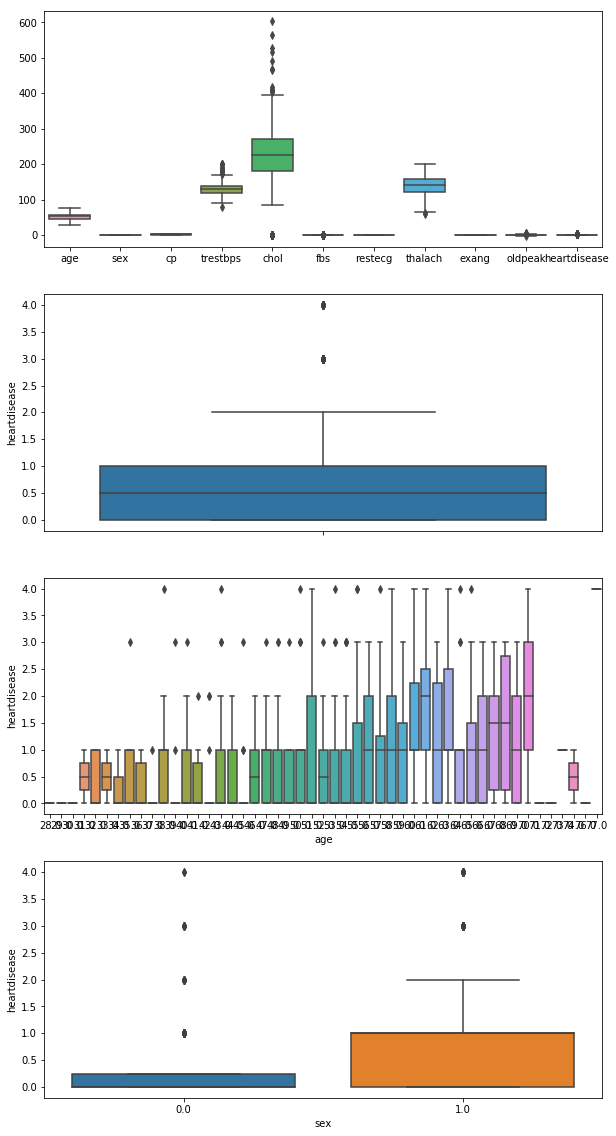

In [8]:
# Outlier detection and class imbalance check
fig,axes=plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="heartdisease",orient="v",ax=axes[1])
sns.boxplot(data=data,y="heartdisease",x="age",orient="v",ax=axes[2])
sns.boxplot(data=data,y="heartdisease",x="sex",orient="v",ax=axes[3])

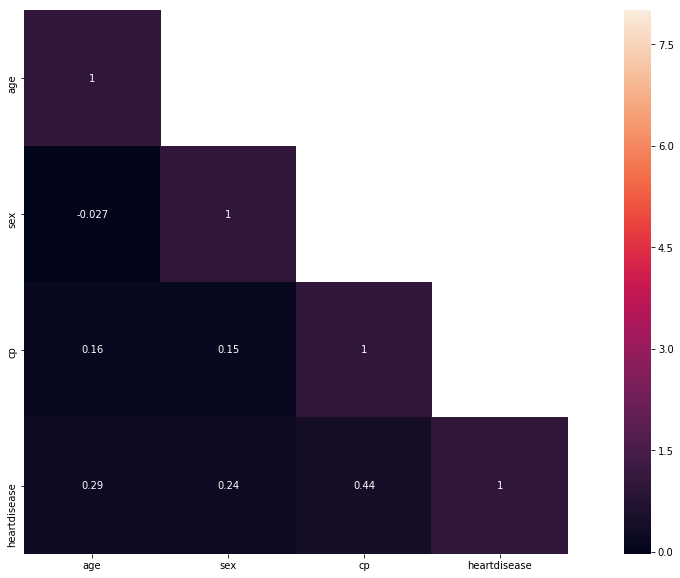

In [10]:
# correlation analysis
corr=data.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,mask=mask,vmax=8,square=True,annot=True)

In [11]:
# model
from sklearn.preprocessing import normalize,Imputer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

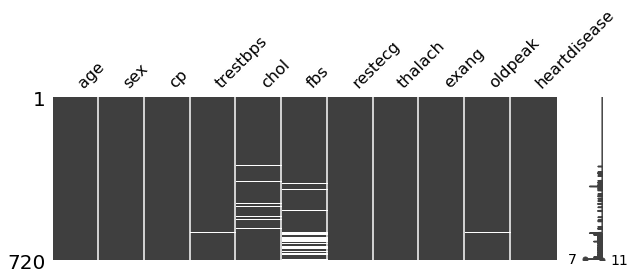

In [12]:
msno.matrix(data,figsize=(10,3))

In [13]:
# replace nan
imp=Imputer(missing_values="NaN",strategy="mean",axis=0)
imputedData=imp.fit_transform(data)

In [14]:
# splitting data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(imputedData[:,:-1],imputedData[:,-1],test_size=0.3,random_state=42)

In [15]:
# Scale data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
# Build and train the model
classifier=svm.SVC(kernel="rbf")
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

In [17]:
# Accuracy
accuracy_score(y_test,preds)

0.6527777777777778

In [21]:
preds[:5]

array([0., 0., 1., 0., 0.])

In [20]:
y_test[:5]

array([0., 1., 1., 0., 0.])